### Reading the data from local machine

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Advertising.csv') # reading csv file
data.head() # displaying first 5 rows by default

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### The first column is column which contains ID nos.identifying rows nos. By default it starts from zero. We can figure out how to set index nos. Click on the csv file written here and click shift + tab + tab from keyboard. We can see that there is index_col parameter which allow us to set any column as index. We can set now index_col = 0 to set Unnamed column as our index parameter.

In [67]:
data = pd.read_csv('Advertising.csv', index_col = 0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Selecting Feature

#### What are the features?
*  __TV__: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
*  __Radio__: advertising dollars spent on radio
*  __Newspaper__: advertising dollars spent on newspaper

#### What is the response?
*  __Sales__: sales of a single product in given market (in thousands of items)

#### Is this Regression ?
*  Because our response variable is continuous, this is regression problem.

In [68]:
feature_col = ['TV','Radio','Newspaper']
feature_col

['TV', 'Radio', 'Newspaper']

In [69]:
X = data[feature_col]
print(X)

        TV  Radio  Newspaper
1    230.1   37.8       69.2
2     44.5   39.3       45.1
3     17.2   45.9       69.3
4    151.5   41.3       58.5
5    180.8   10.8       58.4
..     ...    ...        ...
196   38.2    3.7       13.8
197   94.2    4.9        8.1
198  177.0    9.3        6.4
199  283.6   42.0       66.2
200  232.1    8.6        8.7

[200 rows x 3 columns]


In [70]:
print(X.shape)

(200, 3)


In [71]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


### Selecting the target/ response

In [72]:
target = ['Sales']
y = data[target]
print(y)

     Sales
1     22.1
2     10.4
3      9.3
4     18.5
5     12.9
..     ...
196    7.6
197    9.7
198   12.8
199   25.5
200   13.4

[200 rows x 1 columns]


In [73]:
print(y.shape)

(200, 1)


In [74]:
print(type(y))

<class 'pandas.core.frame.DataFrame'>


### Visualizing data using seaborn

In [75]:
import seaborn as sns
%matplotlib inline 

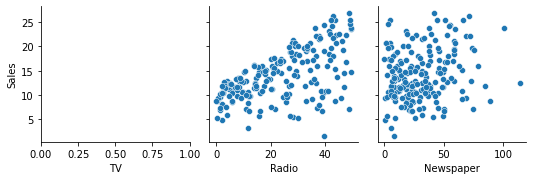

In [76]:
# visualize the relationship between the features and response using pairplot 
sns.pairplot(data, x_vars = ['TV','Radio','Newspaper'], y_vars = 'Sales')

### The first subplot is blank. This is because the axis is starting from 0.0 and ending upto 1.0. This is seaborn issue which uses the wrong indices for the off diagonal plots when the grid is set up such that matched x/y vars do not fall on the diagonal. In short all axes are not used. Pairplot shows a marginal plot on the 'diagonal' axes even when the overall grid is not square. To overcome this scenario, setting diag_kind = None disables this and shows a bivariate plot on all axes.

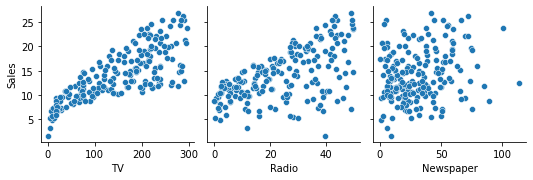

In [77]:
sns.pairplot(data, x_vars = ['TV','Radio','Newspaper'], y_vars = 'Sales', diag_kind = None)

### The size and aspect ratio can be increased to visualize the graph content more clearly.

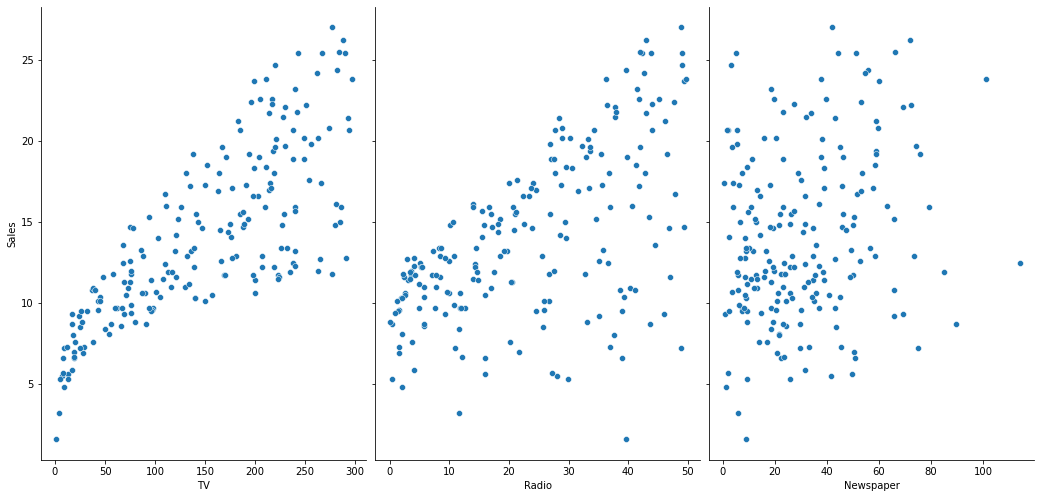

In [78]:
sns.pairplot(data, x_vars = ['TV','Radio','Newspaper'], y_vars = 'Sales', height = 7, 
             aspect = 0.7, diag_kind = None)

### What these graphs conclude?
*  As the TV advertising increases, TV sales increases.
*  There is a less sales- advertising relation for radio as comparated to TV.
*  As the advertising for newspaper increases, there is almost no effect on its sales.

### Using seaborn we can also plot another feature that will give the best-fit line. Writing kind = 'reg' plots the best-fit. Since, this is a perfect plot showing linear relationship between feature and response, linear regression is the best learning algorithm which can be used here. 

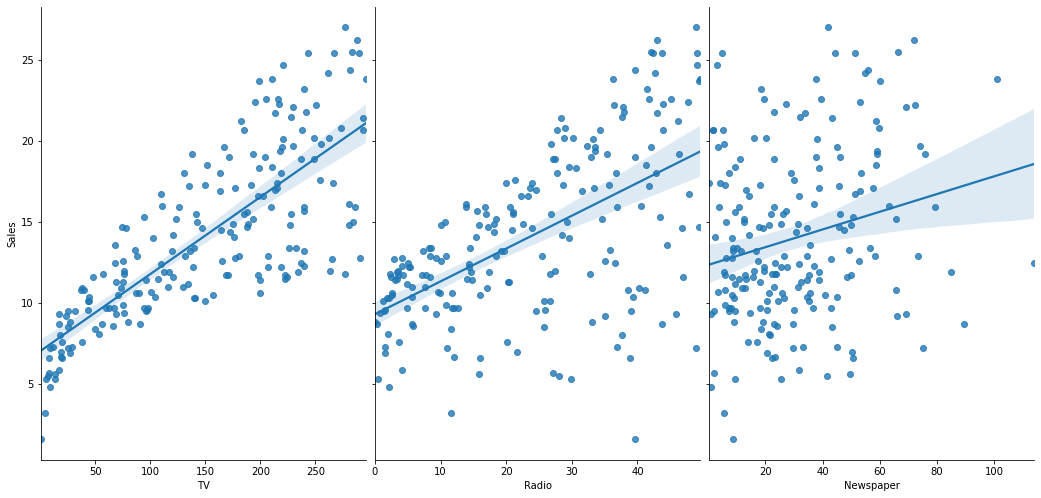

In [79]:
sns.pairplot(data, x_vars = ['TV','Radio','Newspaper'], y_vars = 'Sales', height = 7, 
             aspect = 0.7, kind = 'reg', diag_kind = None)

### Linear Regression in Scikit Learn

*  __Pros__ = fast, no tuning required, highly interpretable, well understood.
*  __Cons__ = unlikely to produce best predictive accuracy (it always presumes linear relationship between feature and response)

### Form of linear regression

*  Y = B0 + B1X1 + B2X2 + ... + BnXn
<br>where,
    *  B0 is a constant or intercept
    *  B1 is the regression coefficient for x1 (first feature)
    *  B2 is the regression coefficient for x2 (second feature)
    *  Bn is the regression coefficient for xn (nth feature)

In this case:<br>
__Y = B0 + B1 x TV + B2 x Radio + B3 x Newspaper__

The __B__ values are called the __model coefficients__. These values are __learned__ during the model fitting step using the __least squares__ criterion. Then the fitted model can be used to make predictions.

### Splitting X and y into training and testing set

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150, 1)
(50, 1)


In [82]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression() # instantiate
linreg.fit(X_train, y_train) # model fit (learn the coefficients)

LinearRegression()

### Interpreting Model Coefficients

In [83]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[2.87696662]
[[0.04656457 0.17915812 0.00345046]]


In [84]:
# pair the feature names with the coefficient
print(feature_col, linreg.coef_)

['TV', 'Radio', 'Newspaper'] [[0.04656457 0.17915812 0.00345046]]


Interpreting this:<br>
__Y = 2.88 + 0.046 x TV + 0.179 x Radio + 0.003 x Newspaper__

*  For a given amount of Radio and Newspaper ad spending, __one unit__ increase in TV ad spending is associated with an __0.046 unit__ increase in sales.
*  Or more clearly: For a given amount of Radio & Newspaper ad spending, an additional __1000$ spent on TV ads__ is associated with __an increase in sales of 46.6 items__.

### Making Predictions

In [85]:
y_pred = linreg.predict(X_test)

In [86]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328953


### Feature Selection<br>
Does __Newspaper__ belong in our model? In other words, does it imporove the quality of predictions? Let us remove it from the model and check the RMSE.

In [87]:
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


### Final Conclusion
The RMSE __decreased__ when we removed Newspaper from the model. Error is something we want to minimize, so a __lower number of RMSE is better__. Thus, __Newspaper__ feature is not so useful and can be removed from this model. 